<a href="https://colab.research.google.com/github/benjaminhossain/covid-data3/blob/main/covid19_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid 19 data analysis

Data from New York Times: https://github.com/nytimes/covid-19-data.

https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv,

#Env Setup


In [75]:
#python libraries and more else
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#data_collection
New York Times github repository is used as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose.

In [76]:
df = pd.read_csv ('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [77]:
#This will return the first five rows
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [78]:
# Return a tuple representing the dimensionality of the DataFrame. below example shows (rows, columns)
df.shape

(61942, 5)

In [79]:
# The column labels of the DataFrame
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

#Data Analysis

Analyzing covid-19 data for New York State



In [80]:
ny_df = df[df['state']=='New York']

In [81]:
ny_df.head(30)


,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
338,2020-03-06,New York,36,44,0
369,2020-03-07,New York,36,89,0
404,2020-03-08,New York,36,106,0
440,2020-03-09,New York,36,142,0
478,2020-03-10,New York,36,173,0


In [82]:
ny_df.shape

(1118, 5)

In [83]:
ny_df.tail()

,date,state,fips,cases,deaths
61696,2023-03-19,New York,36,6800591,79982
61752,2023-03-20,New York,36,6801319,79984
61808,2023-03-21,New York,36,6802990,79987
61864,2023-03-22,New York,36,6803974,80138
61920,2023-03-23,New York,36,6805271,80109


In [84]:
ny_df['cases'].max()

6805271

In [85]:
ny_df['cases'].min()

1

In [86]:
ny_df['cases'].sum()

3481460364

In [87]:
ny_df['cases'].mean()

3114007.481216458

#Finding new Covid-19 cases on a daily basis

In [88]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  print(newcase_count)

1
0
1
9
11
22
45
17
36
31
44
109
95
189
122
218
425
1012
1774
2952
3258
4817
5711
4805
7413
5941
5688
8771
6266
7721
8707
8153
8996
10329
12274
8122
9304
8314
9568
10765
10794
10160
8435
6548
7402
11755
8631
7532
7249
6199
4867
4324
5659
6341
8286
10683
6013
4077
3285
4718
4702
3879
4559
3699
2524
2302
2746
3526
2873
2715
2138
1610
1438
2123
2364
2759
2185
1901
1241
1479
1478
2078
1678
1754
1601
1279
1044
1132
1758
1549
1363
1104
945
1361
1043
1053
1042
1083
777
712
690
664
724
821
912
694
623
630
561
626
794
707
665
555
598
575
738
804
697
624
391
458
628
872
919
725
536
516
590
691
588
790
727
679
559
913
834
767
778
752
509
519
855
706
810
758
748
532
613
535
711
779
642
754
531
542
746
639
694
720
706
513
478
667
706
736
724
738
609
410
662
626
599
707
651
581
404
629
568
789
635
635
709
649
757
710
888
863
799
729
525
557
573
756
861
849
725
586
767
653
893
793
983
865
575
751
666
953
909
1006
868
836
1188
1005
1383
1601
1728
1226
937
1394
1356
1835
1593
1448
1143
1032
1391
1235
1

In [89]:
ny_df['new_cases'] = newcase

<ipython-input-89-67a698e487e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_cases'] = newcase


In [90]:
#Number of new deaths
newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['deaths']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  #print(newcase_count)
#this prints the new cases count

In [91]:
ny_df['new_deaths'] = newcase

<ipython-input-91-a0f068121472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_deaths'] = newcase


In [92]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0


In [93]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases,new_deaths
61696,2023-03-19,New York,36,6800591,79982,551,0
61752,2023-03-20,New York,36,6801319,79984,728,2
61808,2023-03-21,New York,36,6802990,79987,1671,3
61864,2023-03-22,New York,36,6803974,80138,984,151
61920,2023-03-23,New York,36,6805271,80109,1297,-29


In [94]:
ny_df['new_cases'].sum()

6805271

In [95]:
ny_df['new_deaths'].sum()

80109

In [105]:
ny_cases = ny_df['cases']
#defining a value as cases from COVID, some are exagerated
ny_deaths = ny_df['deaths']
#defining a variable for deaths from COVID
ny_dates = ny_df['date']
#the variable for the data of each prompt.
ny_new_cases = ny_df['new_cases']
#the value for new cases from COVID
ny_new_deaths = ny_df['new_deaths']

In [97]:
type(ny_new_cases)

pandas.core.series.Series

<Axes: >

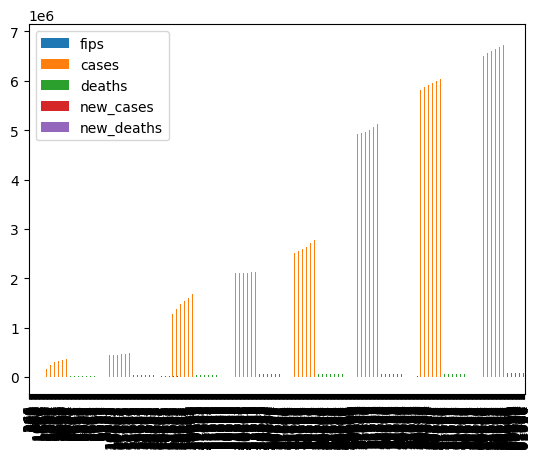

In [98]:
ny_df.plot(kind='bar')

In [111]:
plt.figure(figsize=(300,100))
#Create a new figure, or activate an existing figure
plt.bar(x=ny_dates,height =ny_new_cases,color='red')
#make a bar plot
plt.xticks(rotation=90)
#Get or set the current tick locations and labels of the x-axis
plt.show()

In [100]:
ny_df['date'].max()

'2023-03-23'

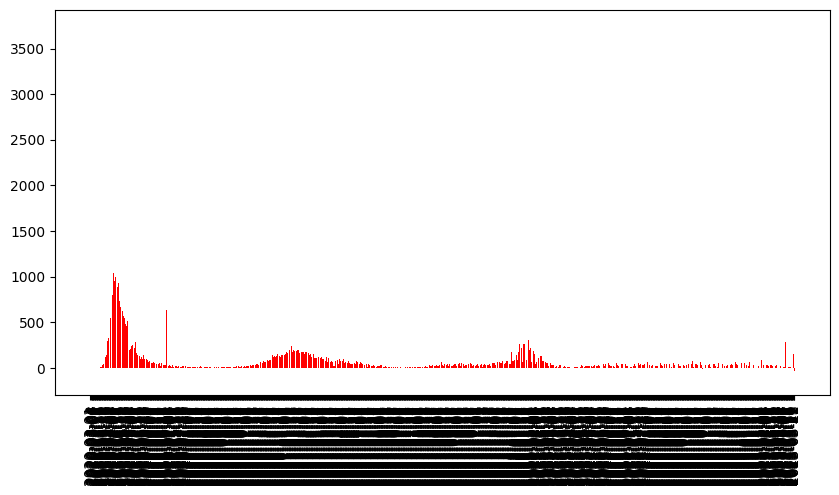

In [107]:
plt.figure(figsize=(10,5))
#Create a new figure, or activate an existing figure
plt.bar(x=ny_dates,height = ny_new_deaths,color='red')
#make a bar plot
plt.xticks(rotation=90)
#Get or set the current tick locations and labels of the x-axis
plt.show()

#NY Covid-19 data in the last 7 days

In [125]:
ny_cases_7 = ny_df['cases'][-8:-1]
#defining a value for
ny_deaths_7 = ny_df['new_deaths'] [-8:-1]
ny_dates_7 = ny_df['date'][-8:-1]
ny_new_cases_7 = ny_df['new_cases'][-8:-1]

In [126]:
ny_dates_7

,date
61528,2023-03-16
61584,2023-03-17
61640,2023-03-18
61696,2023-03-19
61752,2023-03-20
61808,2023-03-21
61864,2023-03-22


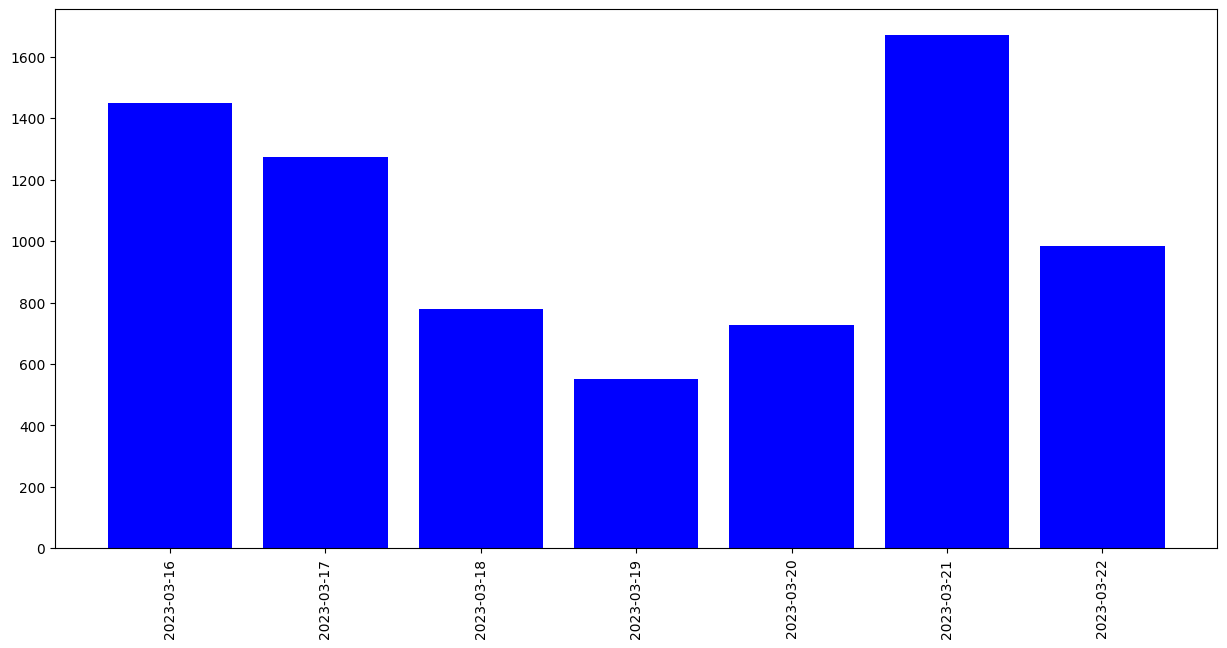

In [127]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_7, height=ny_new_cases_7, color='blue')
plt.xticks(rotation=90) # Rotate X-Axis Tick Labels by 90 deg (rotation 90)
plt.show()
#This will show new cases in the last seven days.

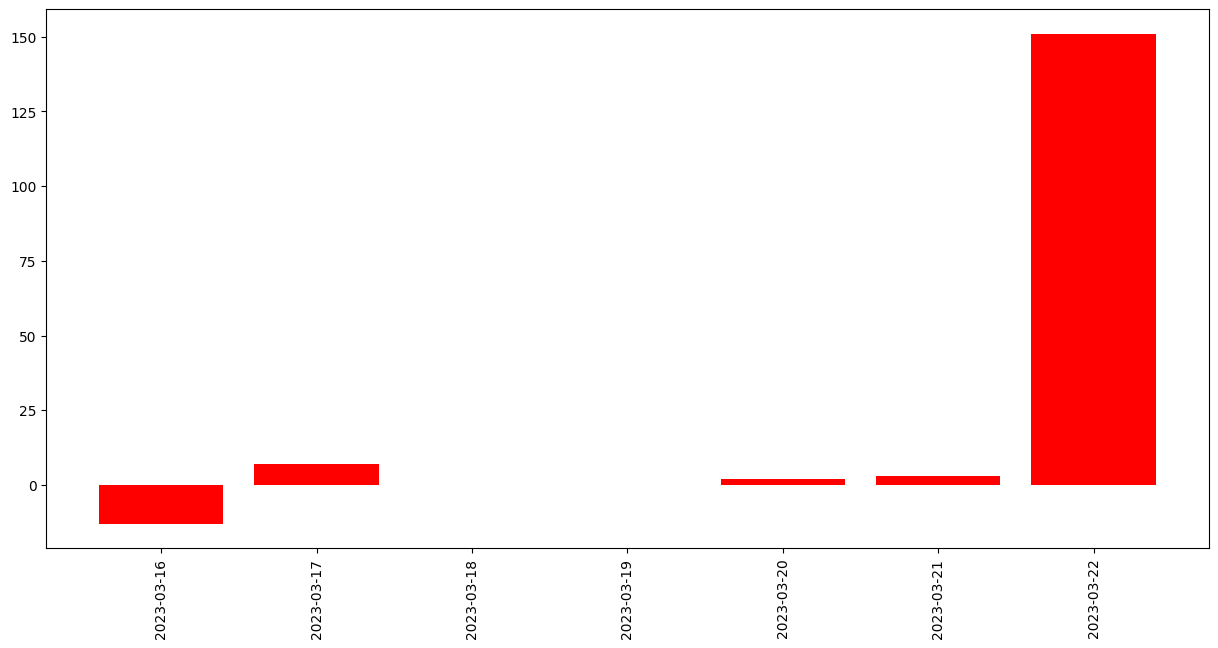

In [128]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_7, height=ny_deaths_7, color='red')
plt.xticks(rotation=90) # Rotate X-Axis Tick Labels by 90 deg (rotation 90)
plt.show()
#This will show new deaths in the last seven days.

#Comparing Covid-19 data among states

In [121]:
states = ['New York', 'Arizona', 'Florida', 'Texas', 'California']

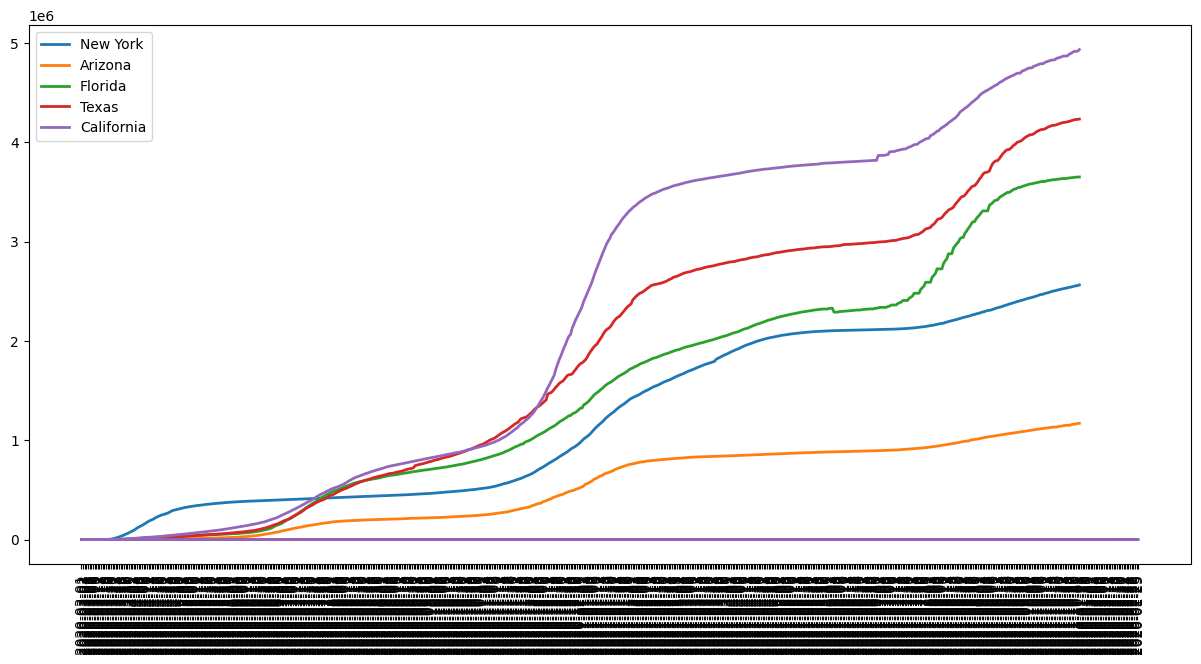

In [129]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']<='2021-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)  # Place a legend on the Axes.
plt.show()
#This will show the trend curve for each state chosen on this graph
#In this particular case, the five states

#Conclusion
- Number cases are much higher than deaths
- California had the highest number of cases
- NY was the 4th in the number of cases
- January, 2022 had the highest number of cases